In [418]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
import cv2
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16,ResNet50


**1.Carga csv**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 7


In [419]:
file_path = 'C:/Users/andre/Downloads/csv_final_video7.csv'
df = pd.read_csv(file_path)

df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}"
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}"
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}"
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}"
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}"


In [420]:
# Asegurarnos de que la columna 'label' exista
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df[['filename', 'label']].head()

,filename,label
0,surco-rouviere-244.jpg,vesicula
1,surco-rouviere-244.jpg,surco
2,surco-rouviere-244.jpg,segmento4
3,surco-rouviere-326.jpg,vesicula
4,surco-rouviere-326.jpg,surco


In [421]:
# Función para convertir las coordenadas del formato JSON a (x_min, y_min, x_max, y_max)
def convert_to_bounding_box(region_shape_attributes):
    shape_dict = ast.literal_eval(region_shape_attributes)
    x_min = shape_dict['x']
    y_min = shape_dict['y']
    x_max = x_min + shape_dict['width']
    y_max = y_min + shape_dict['height']
    return x_min, y_min, x_max, y_max

In [422]:


# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df['x_min'], df['y_min'], df['x_max'], df['y_max'] = zip(*df['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()

,filename,x_min,y_min,x_max,y_max,label
0,surco-rouviere-244.jpg,298,192,634,426,vesicula
1,surco-rouviere-244.jpg,259,367,394,475,surco
2,surco-rouviere-244.jpg,519,55,698,210,segmento4
3,surco-rouviere-326.jpg,298,64,531,470,vesicula
4,surco-rouviere-326.jpg,142,250,312,420,surco


In [423]:
array_filename= df['filename'].unique()

In [424]:
array_filename.shape

(61,)

In [425]:
df.shape

(182, 12)

**Carga csv 2**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 2

In [426]:
file_path2 = 'C:/Users/andre/Downloads/csv_final_video2.csv'
df2 = pd.read_csv(file_path2)

df2.head()


,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,frame_15090.jpg,115668,{},3,0,"{""name"":""rect"",""x"":476,""y"":138,""width"":153,""he...","{""Region"":""vesicula""}"
1,frame_15090.jpg,115668,{},3,1,"{""name"":""rect"",""x"":338,""y"":277,""width"":132,""he...","{""Region"":""surco""}"
2,frame_15090.jpg,115668,{},3,2,"{""name"":""rect"",""x"":638,""y"":234,""width"":120,""he...","{""Region"":""segmento4""}"
3,frame_15103.jpg,128711,{},3,0,"{""name"":""rect"",""x"":454,""y"":145,""width"":143,""he...","{""Region"":""vesicula""}"
4,frame_15103.jpg,128711,{},3,1,"{""name"":""rect"",""x"":370,""y"":305,""width"":166,""he...","{""Region"":""surco""}"


In [427]:
# Asegurarnos de que la columna 'label' exista
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df2[['filename', 'label']].head()


,filename,label
0,frame_15090.jpg,vesicula
1,frame_15090.jpg,surco
2,frame_15090.jpg,segmento4
3,frame_15103.jpg,vesicula
4,frame_15103.jpg,surco


In [428]:
# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df2['x_min'], df2['y_min'], df2['x_max'], df2['y_max'] = zip(*df2['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df2[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()


,filename,x_min,y_min,x_max,y_max,label
0,frame_15090.jpg,476,138,629,475,vesicula
1,frame_15090.jpg,338,277,470,446,surco
2,frame_15090.jpg,638,234,758,382,segmento4
3,frame_15103.jpg,454,145,597,468,vesicula
4,frame_15103.jpg,370,305,536,439,surco


In [429]:
array_filename2= df2['filename'].unique()
array_filename2.shape

(135,)

In [430]:
df2.shape

(405, 12)

In [431]:
merged_df = pd.concat([df, df2], ignore_index=True)
merged_df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}",vesicula,298,192,634,426
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}",surco,259,367,394,475
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}",segmento4,519,55,698,210
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}",vesicula,298,64,531,470
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}",surco,142,250,312,420


In [432]:
merged_df.tail()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
582,frame_24361.jpg,106592,{},3,1,"{""name"":""rect"",""x"":407,""y"":404,""width"":139,""he...","{""Region"":""surco""}",surco,407,404,546,473
583,frame_24361.jpg,106592,{},3,2,"{""name"":""rect"",""x"":461,""y"":236,""width"":281,""he...","{""Region"":""segmento4""}",segmento4,461,236,742,359
584,frame_24462.jpg,121924,{},3,0,"{""name"":""rect"",""x"":119,""y"":126,""width"":346,""he...","{""Region"":""vesicula""}",vesicula,119,126,465,388
585,frame_24462.jpg,121924,{},3,1,"{""name"":""rect"",""x"":375,""y"":402,""width"":134,""he...","{""Region"":""surco""}",surco,375,402,509,463
586,frame_24462.jpg,121924,{},3,2,"{""name"":""rect"",""x"":471,""y"":228,""width"":251,""he...","{""Region"":""segmento4""}",segmento4,471,228,722,356


In [433]:
merged_df.shape

(587, 12)

**2.Carga de las imágenes**

In [434]:
images = []

In [435]:
# Directorio donde están almacenadas las imágenes
image_dir = 'C:/Users/andre/Documents/Video07/framesVideo/surco-rouviere'
image_dir2 = 'C:/Users/andre/Documents/Video02/framesVideo/extraccion'

In [436]:


# Directorio donde deseas guardar las imágenes seleccionadas
destination_directory = './durante-cirugia/'  

# Asegúrate de que el directorio de destino existe
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Extraer y copiar los archivos seleccionados
for filename in array_filename:
    source_path = os.path.join(image_dir, filename)
    destination_path = os.path.join(destination_directory, filename)
    
    # Verifica si el archivo existe en el directorio original
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
    else:
        print(f"Advertencia: {filename} no se encontró en {image_dir}")

for filename in array_filename2:
    source_path = os.path.join(image_dir2, filename)
    destination_path = os.path.join(destination_directory, filename)
    
    # Verifica si el archivo existe en el directorio original
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
    else:
        print(f"Advertencia: {filename} no se encontró en {image_dir2}")

print("Proceso completado.")



Proceso completado.


In [437]:
def read_imageResize_with_labels(dir='..\database\dataset', target_size=(224, 224)):
    """
    Lee imágenes de un directorio, las redimensiona a 224x224 píxeles y las etiqueta según 
    la carpeta en la que se encuentran. Las imágenes son procesadas en escala de grises.

    Parámetros:
    dir (str): La ruta del directorio que contiene las carpetas 'antes-cirugia', 
               'durante-cirugia', y 'despues-cirugia'. Las carpetas deben estar en la 
               misma ubicación. Las carpetas no definidas recibirán una etiqueta de -1.

    Retorno:
    tuple: Una tupla que contiene dos elementos:
        - np.array: Un array de NumPy con las imágenes redimensionadas.
        - list: Una lista de etiquetas correspondientes a las imágenes.
    """
    labels = []
    imgs = []
    
    # Definir las carpetas y sus etiquetas correspondientes
    class_folders = {
        'antes-cirugia': 0,
        'durante-cirugia': 1,
        'despues-cirugia': 2
    }

    # Procesar cada carpeta en el directorio principal
    for folder, label in class_folders.items():
        folder_path = os.path.join(dir, folder)
        
        if not os.path.isdir(folder_path):
            print(f"Advertencia: {folder_path} no es un directorio válido.")
            continue
        
        # Procesar cada imagen en la carpeta
        for name_image in os.listdir(folder_path):
            # Obtener la ruta de la imagen
            image_path = os.path.join(folder_path, name_image)
            
            # Leer la imagen 
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # Redimensionar la imagen
            image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
            image = image / 255.0

            # Agregar la imagen y su etiqueta a las listas
            imgs.append(image)
            labels.append(label)
    
    return np.array(imgs), labels

In [438]:
# Llamar a la función con la ruta adecuada
images, labels = read_imageResize_with_labels(dir='./')

# Verificar el tamaño de los arrays resultantes
print(f"Número de imágenes: {images.shape[0]}")
print(f"Tamaño de cada imagen: {images.shape[1:]}")

# Verificar las etiquetas
print(f"Etiquetas únicas: {set(labels)}")

Número de imágenes: 588
Tamaño de cada imagen: (224, 224, 3)
Etiquetas únicas: {0, 1, 2}


In [439]:
print(type(images[0]))

<class 'numpy.ndarray'>


In [440]:
import os

# Lista de imágenes en el directorio
images_in_directory = set(os.listdir(destination_directory))

# Lista de imágenes en el DataFrame
images_in_dataframe = set(merged_df['filename'].unique())

# Imágenes que están en el directorio pero no en el DataFrame
missing_in_dataframe = images_in_directory - images_in_dataframe

# Imágenes que están en el DataFrame pero no en el directorio
missing_in_directory = images_in_dataframe - images_in_directory

# Mostrar los resultados
print(f"Imágenes en el directorio pero no en el DataFrame: {len(missing_in_dataframe)}")
print(missing_in_dataframe)

print(f"Imágenes en el DataFrame pero no en el directorio: {len(missing_in_directory)}")
print(missing_in_directory)


Imágenes en el directorio pero no en el DataFrame: 0
set()
Imágenes en el DataFrame pero no en el directorio: 0
set()


**Procesamiento de la imágenes**

Se redimensionan a un tamaño de 224x224,se normalizan y adicionamente se obtienen las coordenadas de cada región de la imagen

In [441]:
def data_generator_coordinates(df, image_dir, input_size=(224, 224)):
    
    """
    Generador de datos para modelos de aprendizaje profundo que procesa imágenes y sus cuadros delimitadores.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame con información de las imágenes y sus regiones de interés (coordenadas y etiquetas).
    image_dir : str
        Ruta del directorio donde se encuentran las imágenes.
    input_size : tuple, opcional
        Tamaño para redimensionar las imágenes (por defecto, (224, 224)).

    Yields:
    -------
    images : numpy.ndarray
        Array de imágenes redimensionadas y normalizadas.
    targets : dict
        Diccionario con cuadros delimitadores ('bounding_box') y etiquetas ('class_label').

    Descripción:
    ------------
    Redimensiona las imágenes y ajusta los cuadros delimitadores. Si una imagen tiene menos de tres regiones, 
    se añaden cuadros vacíos. Ideal para entrenar modelos con múltiples regiones por imagen.
    """


    images_now = []
    bbox_targets = []
    class_targets = []
    
    for filename in df['filename'].unique():
        image_path = os.path.join(image_dir, filename)

         # Leer la imagen y redimensionarla
        image = cv2.imread(image_path)
        height, width = image.shape[:2]
        if image is None:
            print(f"Advertencia: No se pudo leer la imagen {filename}")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, input_size, interpolation=cv2.INTER_LINEAR)
        image = image / 255.0
        
        df_image = df[df['filename'] == filename]
        bboxes = []
        labels = []
        
        for _, row in df_image.iterrows():
            label_map = {'vesicula': 0, 'surco': 1, 'segmento4': 2}
            label = label_map.get(row['label'], -1)
            x_scale = input_size[0] / width
            y_scale = input_size[1] / height
            
            x_min = row['x_min'] * x_scale
            y_min = row['y_min'] * y_scale
            x_max = row['x_max'] * x_scale
            y_max = row['y_max'] * y_scale
            
            bbox = [x_min, y_min, x_max, y_max]
            bboxes.append(bbox)
            labels.append(label)
        
        while len(bboxes) < 3:
            bboxes.append([0, 0, 0, 0])  # Cuadro delimitador vacío
            labels.append(-1)  # Etiqueta no válida


        images_now.append(image)
        bbox_targets.append(bboxes)
        class_targets.append(tf.keras.utils.to_categorical(labels, num_classes=3))
    
    images_now = np.array(images_now)
    bbox_targets = np.array(bbox_targets)
    class_targets = np.array(class_targets)
    
    return images_now, {"bounding_box": bbox_targets, "class_label": class_targets}

In [442]:

images_class1, targets = data_generator_coordinates(merged_df, image_dir=destination_directory, input_size=(224, 224))

In [443]:
print(images.shape)

(588, 224, 224, 3)


In [444]:
images_class1

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [445]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [446]:
targets

{'bounding_box': array([[[ 78.16393443,  89.6       , 166.29508197, 198.8       ],
         [ 67.93442623, 171.26666667, 103.3442623 , 221.66666667],
         [136.13114754,  25.66666667, 183.08196721,  98.        ]],
 
        [[ 78.16393443,  29.86666667, 139.27868852, 219.33333333],
         [ 37.24590164, 116.66666667,  81.83606557, 196.        ],
         [131.93442623,  41.06666667, 180.98360656, 114.8       ]],
 
        [[ 82.09836066,  36.4       , 131.93442623, 204.4       ],
         [ 36.98360656, 127.86666667,  87.60655738, 194.6       ],
         [134.81967213,  82.13333333, 192.52459016, 170.33333333]],
 
        ...,
 
        [[ 33.57377049,  36.86666667, 125.90163934, 188.06666667],
         [107.54098361, 192.26666667, 138.49180328, 223.53333333],
         [123.01639344, 116.66666667, 198.81967213, 169.4       ]],
 
        [[ 29.37704918,  55.06666667, 123.27868852, 178.73333333],
         [106.75409836, 188.53333333, 143.21311475, 220.73333333],
         [120.91803

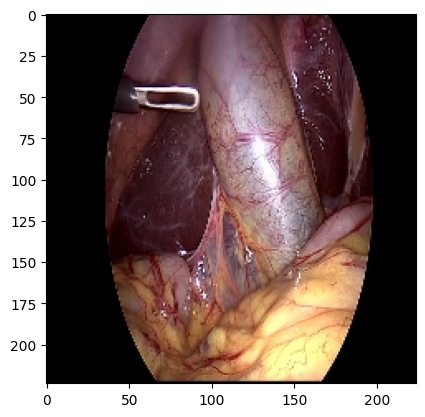

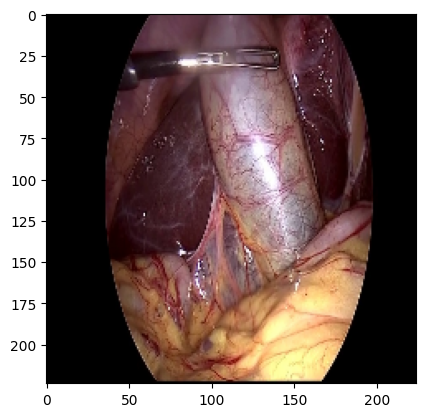

In [447]:
for i in range(2):
    plt.imshow(images[i])
    plt.show()

In [448]:
images.shape

(588, 224, 224, 3)

In [449]:
images_class1.shape

(196, 224, 224, 3)

**División train-test**

In [450]:
labels = np.array(labels)

In [451]:
# Filtrar las imágenes por clase
class_0_indices = np.where(labels == 0)[0]
class_2_indices = np.where(labels == 2)[0]

images_class_0 = images[class_0_indices]
images_class_2 = images[class_2_indices]


In [452]:
print(len(class_0_indices))

196


In [453]:
print(images_class_0)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0

In [454]:
# Combinar todas las imágenes en un solo array
images_combined = np.concatenate([images_class_0, images_class1, images_class_2], axis=0)

# Crear un array de coordenadas inicializado con ceros para todas las imágenes
# La forma será (total de imágenes, 3, 4) para las coordenadas
coordinates_combined = np.zeros((len(images_combined), 3, 4))

# Asignar las coordenadas correspondientes a las imágenes de clase 1 en el array combinado
coordinates_combined[len(images_class_0):len(images_class_0) + len(images_class1)] = targets['bounding_box']

# Crear las etiquetas combinadas
labels_combined = np.concatenate([labels[class_0_indices], np.ones(len(images_class1)), labels[class_2_indices]], axis=0)


In [455]:


# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val, coord_train, coord_val = train_test_split(
    images_combined, labels_combined, coordinates_combined, test_size=0.2, random_state=42, stratify=labels_combined)

# Convertir las etiquetas a formato one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)

# Ahora puedes utilizar X_train, coord_train, y_train_cat para entrenar tu modelo



In [456]:
from collections import Counter 
# Verificar las proporciones en los conjuntos de entrenamiento, validación y prueba
print("Proporciones en el conjunto de entrenamiento:", Counter(y_train))
print("Proporciones en el conjunto de validación:", Counter(y_val))


Proporciones en el conjunto de entrenamiento: Counter({1.0: 157, 0.0: 157, 2.0: 156})
Proporciones en el conjunto de validación: Counter({2.0: 40, 1.0: 39, 0.0: 39})


In [457]:
print(type(coord_train))

<class 'numpy.ndarray'>


In [458]:
X_train

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [459]:
coord_train

array([[[ 68.72131148,  62.53333333, 115.14754098, 215.13333333],
        [ 44.59016393, 173.13333333,  70.03278689, 210.        ],
        [109.1147541 ,  42.46666667, 182.03278689, 153.06666667]],

       [[ 51.93442623,  11.2       , 112.        , 169.4       ],
        [ 89.44262295, 175.46666667, 118.03278689, 218.4       ],
        [117.24590164,  73.73333333, 153.70491803, 159.6       ]],

       [[ 79.73770492,   7.46666667, 143.21311475, 155.4       ],
        [ 85.50819672, 158.2       , 133.7704918 , 200.66666667],
        [146.62295082,  87.73333333, 166.03278689, 132.06666667]],

       ...,

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.

In [460]:
y_train

array([1., 1., 1., 2., 0., 0., 2., 1., 2., 0., 2., 1., 0., 1., 1., 2., 1.,
       2., 1., 0., 2., 0., 1., 1., 1., 2., 1., 0., 0., 2., 0., 2., 2., 0.,
       2., 2., 0., 1., 2., 0., 0., 0., 1., 2., 0., 0., 1., 0., 0., 0., 1.,
       2., 2., 2., 0., 0., 2., 0., 1., 2., 0., 0., 1., 0., 2., 2., 1., 1.,
       2., 1., 2., 2., 0., 1., 1., 1., 1., 1., 0., 1., 2., 2., 0., 1., 2.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 2., 1., 0., 0., 1., 2.,
       0., 0., 2., 0., 0., 0., 1., 2., 0., 1., 0., 0., 1., 1., 2., 0., 2.,
       1., 0., 0., 2., 0., 1., 0., 1., 0., 1., 0., 2., 1., 1., 1., 0., 1.,
       2., 2., 2., 0., 1., 0., 2., 0., 1., 2., 2., 2., 0., 1., 1., 1., 2.,
       0., 2., 0., 0., 1., 2., 1., 0., 2., 1., 1., 1., 1., 2., 0., 1., 2.,
       2., 1., 0., 1., 1., 0., 1., 2., 0., 2., 2., 2., 0., 2., 0., 0., 0.,
       0., 2., 0., 0., 1., 0., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 0.,
       2., 2., 0., 2., 0., 2., 1., 2., 0., 2., 2., 0., 0., 2., 0., 1., 0.,
       1., 1., 0., 2., 2.

**Entrenamiento de modelo de transfer learning**

In [461]:
def create_model(base_model_name='VGG16', input_shape=(224, 224, 3), coord_shape=(3, 4), freeze_base_model=True):
    """
    Crea un modelo basado en VGG16 o ResNet50 con la estructura especificada para predecir clases
    utilizando imágenes y coordenadas como entradas.

    Parámetros:
    -----------
    base_model_name : str, opcional
        Nombre del modelo base a utilizar ('VGG16' o 'ResNet50'). Por defecto es 'VGG16'.
    input_shape : tuple, opcional
        Tamaño de la entrada de las imágenes. Por defecto es (224, 224, 3).
    coord_shape : tuple, opcional
        Tamaño de la entrada para las coordenadas. Por defecto es (3, 4).
    freeze_base_model : bool, opcional
        Si True, congela las capas del modelo base. Por defecto es True.

    Retorno:
    --------
    model : keras.Model
        Modelo compilado listo para ser entrenado.
    """
    # Selección del modelo base
    if base_model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    elif base_model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError("base_model_name must be either 'VGG16' or 'ResNet50'")

    # Congelar o no las capas del modelo base
    if freeze_base_model:
        base_model.trainable = False

    # Entrada para las imágenes
    image_input = base_model.input

    # Entrada para las coordenadas
    coord_input = Input(shape=coord_shape, name='coord_input')

    # Extraer características de la imagen
    x = base_model.output
    x = Flatten()(x)

    # Aplanar las coordenadas para la concatenación
    coord_flat = Flatten()(coord_input)

    # Concatenar características de imagen y coordenadas
    combined = Concatenate()([x, coord_flat])

    # Añadir capas densas finales
    x = Dense(32, activation='relu')(combined)
    x = Dropout(0.5)(x)
    output = Dense(3, activation='softmax')(x)

    # Crear el modelo con dos entradas
    model = Model(inputs=[image_input, coord_input], outputs=output)

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Resumen del modelo
    model.summary()

    return model


**VGG16**

In [462]:
model_vgg16 = create_model(base_model_name='VGG16', input_shape=(224, 224, 3), coord_shape=(3, 4), freeze_base_model=True)


Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                          

In [463]:
# Paso 4: Entrenar el modelo
history_vgg16 = model_vgg16.fit(
    [X_train, coord_train], y_train_cat,
    epochs=10,
    validation_data=([X_val, coord_val], y_val_cat))

Epoch 1/10
15/15 [==============================] - 3s 149ms/step - loss: 1.4546 - accuracy: 0.4617 - val_loss: 0.3502 - val_accuracy: 0.8814
Epoch 2/10
15/15 [==============================] - 2s 140ms/step - loss: 0.4686 - accuracy: 0.7681 - val_loss: 0.2035 - val_accuracy: 0.9915
Epoch 3/10
15/15 [==============================] - 2s 146ms/step - loss: 0.3393 - accuracy: 0.8723 - val_loss: 0.1531 - val_accuracy: 0.9831
Epoch 4/10
15/15 [==============================] - 2s 148ms/step - loss: 0.2261 - accuracy: 0.9234 - val_loss: 0.1015 - val_accuracy: 0.9746
Epoch 5/10
15/15 [==============================] - 2s 156ms/step - loss: 0.1962 - accuracy: 0.9277 - val_loss: 0.0661 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 2s 148ms/step - loss: 0.1657 - accuracy: 0.9383 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 2s 145ms/step - loss: 0.1536 - accuracy: 0.9532 - val_loss: 0.0460 - val_accuracy: 1.0000
Epoch 

**Resnet50**

In [464]:
model_resnet = create_model(base_model_name='ResNet50', input_shape=(224, 224, 3), coord_shape=(3, 4), freeze_base_model=True)

# Paso 4: Entrenar el modelo

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_12[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [465]:


history_resnet = model_resnet.fit(
    [X_train, coord_train], y_train_cat,
    epochs=10,
    validation_data=([X_val, coord_val], y_val_cat))

Epoch 1/10
15/15 [==============================] - 11s 132ms/step - loss: 0.9092 - accuracy: 0.5766 - val_loss: 0.5131 - val_accuracy: 0.6695
Epoch 2/10
15/15 [==============================] - 1s 84ms/step - loss: 0.6118 - accuracy: 0.6596 - val_loss: 0.4583 - val_accuracy: 0.8983
Epoch 3/10
15/15 [==============================] - 1s 83ms/step - loss: 0.5709 - accuracy: 0.6723 - val_loss: 0.4698 - val_accuracy: 0.7797
Epoch 4/10
15/15 [==============================] - 1s 84ms/step - loss: 0.5155 - accuracy: 0.7191 - val_loss: 0.3991 - val_accuracy: 0.9153
Epoch 5/10
15/15 [==============================] - 1s 82ms/step - loss: 0.4915 - accuracy: 0.7468 - val_loss: 0.3844 - val_accuracy: 0.8559
Epoch 6/10
15/15 [==============================] - 1s 82ms/step - loss: 0.4600 - accuracy: 0.7745 - val_loss: 0.3585 - val_accuracy: 0.9237
Epoch 7/10
15/15 [==============================] - 1s 82ms/step - loss: 0.4553 - accuracy: 0.7872 - val_loss: 0.3380 - val_accuracy: 0.9153
Epoch 8/10


**Métricas**

In [466]:
# Visualización de curvas de pérdida y precisión
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    
    plt.show()

In [467]:
def evaluate_model(model, X_val, coord_val, y_val_cat, class_names=['antes-cirugia', 'durante-cirugia', 'despues-cirugia']):
    """
    Evalúa el modelo en el conjunto de validación y genera un reporte de clasificación
    junto con una matriz de confusión.

    Parámetros:
    -----------
    model : keras.Model
        Modelo entrenado que se va a evaluar.
    X_val : np.ndarray
        Conjunto de datos de validación (imágenes).
    coord_val : np.ndarray
        Conjunto de datos de validación (coordenadas).
    y_val_cat : np.ndarray
        Etiquetas de validación en formato one-hot.
    class_names : list
        Lista con los nombres de las clases (por defecto: ['antes-cirugia', 'durante-cirugia', 'despues-cirugia']).

    Retorno:
    --------
    None
    """
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Generar predicciones para el conjunto de validación
    y_val_pred = model.predict([X_val, coord_val])

    # Convertir predicciones y etiquetas reales a sus índices de clase
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = np.argmax(y_val_cat, axis=1)

    # Generar un reporte de clasificación
    report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=class_names)
    print("Classification Report:\n", report)

    # Generar una matriz de confusión
    conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()



**VGG16 resultados**

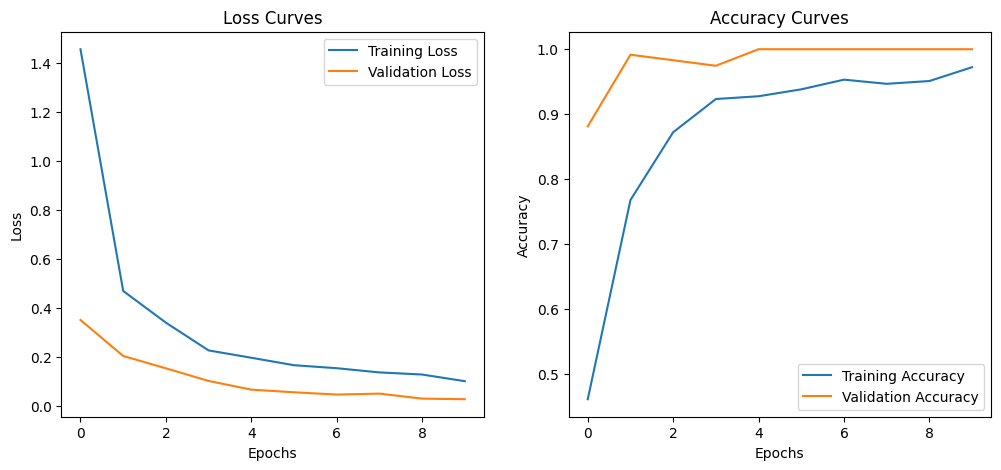

In [468]:
plot_training_history(history_vgg16)

In [469]:
# Evaluar el modelo en los datos de validación
val_loss, val_accuracy = model_vgg16.evaluate([X_val, coord_val], y_val_cat)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


4/4 [==============================] - 0s 92ms/step - loss: 0.0270 - accuracy: 1.0000
Validation Loss: 0.027009854093194008
Validation Accuracy: 1.0


4/4 [==============================] - 0s 95ms/step
Classification Report:
                  precision    recall  f1-score   support

  antes-cirugia       1.00      1.00      1.00        39
durante-cirugia       1.00      1.00      1.00        39
despues-cirugia       1.00      1.00      1.00        40

       accuracy                           1.00       118
      macro avg       1.00      1.00      1.00       118
   weighted avg       1.00      1.00      1.00       118



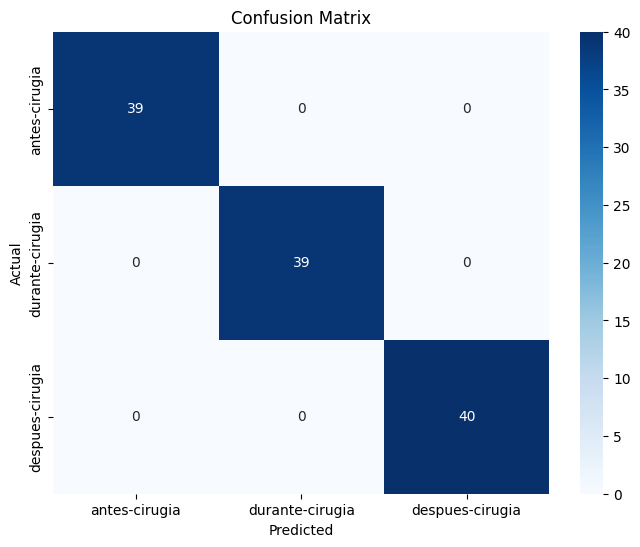

In [470]:
evaluate_model(model_vgg16, X_val, coord_val, y_val_cat)


**Resnet50 Resultados**

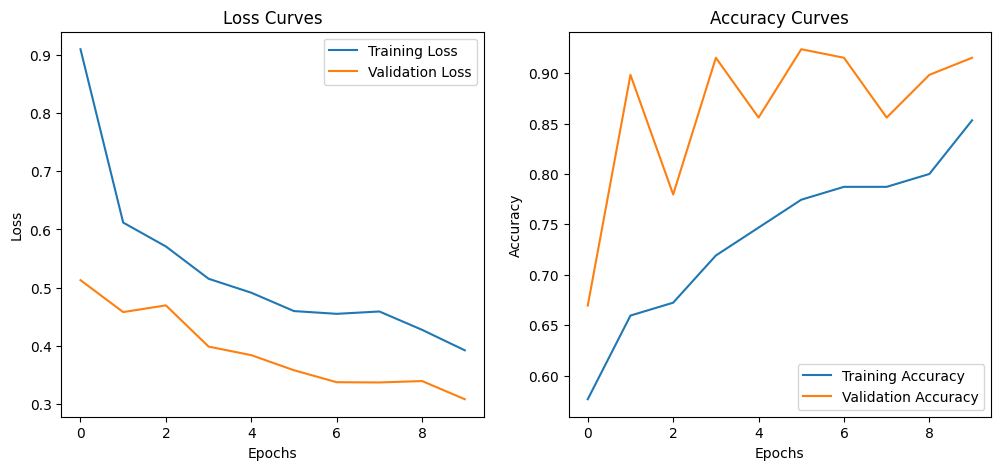

In [471]:
plot_training_history(history_resnet)

In [472]:
# Evaluar el modelo en los datos de validación
val_loss, val_accuracy = model_resnet.evaluate([X_val, coord_val], y_val_cat)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

4/4 [==============================] - 0s 59ms/step - loss: 0.3088 - accuracy: 0.9153
Validation Loss: 0.3088267743587494
Validation Accuracy: 0.9152542352676392


4/4 [==============================] - 1s 61ms/step
Classification Report:
                  precision    recall  f1-score   support

  antes-cirugia       0.82      0.95      0.88        39
durante-cirugia       1.00      1.00      1.00        39
despues-cirugia       0.94      0.80      0.86        40

       accuracy                           0.92       118
      macro avg       0.92      0.92      0.92       118
   weighted avg       0.92      0.92      0.91       118



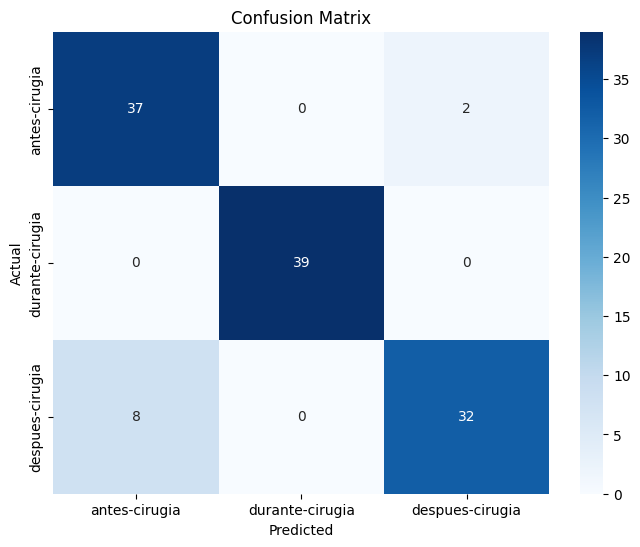

In [473]:
evaluate_model(model_resnet, X_val, coord_val, y_val_cat)

**Comparación modelos**

In [484]:
def plot_comparison(history_vgg16, history_resnet50):
    """
    Genera una gráfica comparativa de la pérdida (loss) y precisión (accuracy) entre dos modelos entrenados.

    Parámetros:
    -----------
    history_vgg16 : keras.callbacks.History
        Historial de entrenamiento del modelo VGG16.
    history_resnet50 : keras.callbacks.History
        Historial de entrenamiento del modelo ResNet50.
    """
    plt.figure(figsize=(14, 6))

    # Comparación de la pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history_vgg16.history['val_accuracy'], label='VGG16 Validation Accuracy')
    plt.plot(history_resnet50.history['val_accuracy'], label='ResNet50 Validation Accuracy')
    plt.title('Comparación de validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Val accuracy')
    plt.legend()

    # Comparación de la precisión
    plt.subplot(1, 2, 2)
    plt.plot(history_vgg16.history['accuracy'], label='VGG16 Training Accuracy')
    plt.plot(history_resnet50.history['accuracy'], label='ResNet50 Training Accuracy')
    plt.title('Comparación de accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


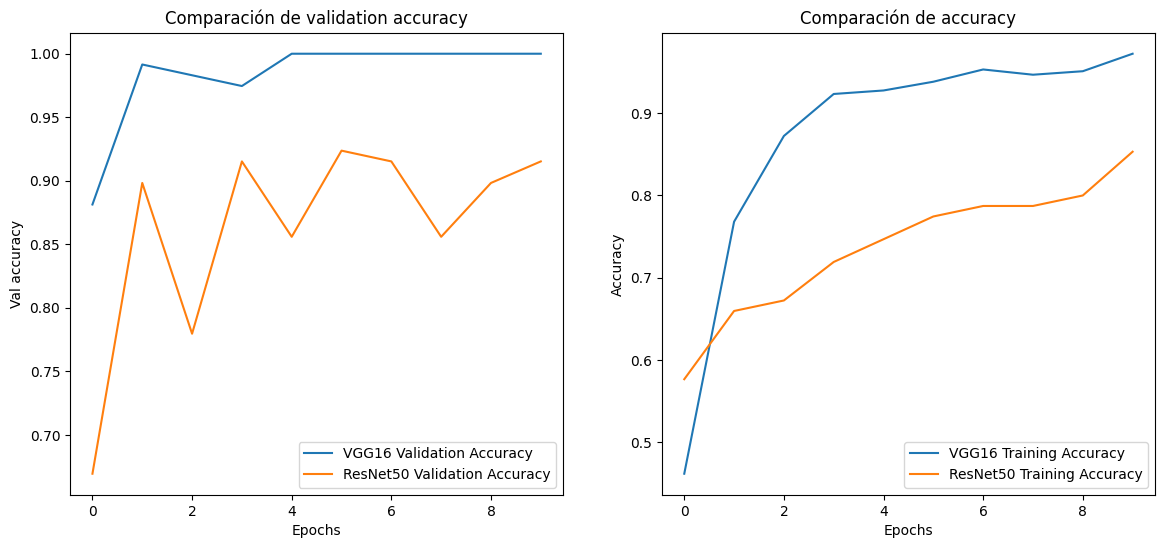

In [485]:
plot_comparison(history_vgg16, history_resnet)


El modelo que se ha diseñado y entrenado está configurado para predecir las clases generales de las imágenes, es decir, está diseñado para determinar si una imagen pertenece a la clase "antes de la cirugía", "durante la cirugía" o "después de la cirugía".

**¿Por qué el modelo predice las clases de las imágenes?**

**Salida del Modelo:**

La última capa del modelo es una capa Dense con 3 neuronas y una activación softmax. Esta configuración indica que el modelo está diseñado para clasificar las entradas en una de tres clases posibles: 0, 1, o 2.

0: Antes de la cirugía.
1: Durante la cirugía.
2: Después de la cirugía.


**Entrada del Modelo:**

El modelo toma dos entradas:
Imágenes: Representadas por X_train, que son las imágenes en sí mismas.
Coordenadas: Representadas por coord_train, que son las coordenadas de las regiones de interés dentro de las imágenes. Sin embargo, estas coordenadas son utilizadas como características adicionales en la clasificación general de la imagen en una de las tres clases mencionadas.
Predicción de Clases Generales:


**Dado que la salida es una clasificación en una de las tres clases generales, el objetivo del modelo es determinar el contexto general de la imagen completa, no la clasificación de las regiones individuales.**